# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
from astroML.stats import binned_statistic_2d

# changing default font sizes and family
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'Cambria' #'serif' Cambria, Times New Roman, Georgia

path = '/Users/melaniearchipley/Box Sync/School/UIUC/ASTR596FDS/homework01_local/'

In [2]:
def load_org_data(fname, obj_type_stars=True):
    getfits, hdr = fits.getdata(os.path.join(path, fname), header=True)
    
    if obj_type_stars:
        print('Making star plots for file {}'.format(fname))
        idx = [idx for idx, val in enumerate(getfits['MEAN_OBJECT_TYPE']) if val > 5]
    else:
        print('Making galaxies plots for file {}'.format(fname))
        idx = [idx for idx, val in enumerate(getfits['MEAN_OBJECT_TYPE']) if val < 5]

    data = getfits['MEAN_PSFMAG'][idx]
    data_RA = getfits['RA_PM'][idx]
    data_DEC = getfits['DEC_PM'][idx]
    data_r = data[:,2]
    data_gi = data[:,1] - data[:,3]
    
    return data_r, data_gi, data_RA, data_DEC

In [3]:
def make_plots_per_dataset(mag_r, mag_gi, data_RA, data_DEC, title, obj_type_stars=True):
    N, xedges, yedges = binned_statistic_2d(mag_r, mag_gi, data_RA, 'count', bins=100)
    RA_mean, xedges, yedges = binned_statistic_2d(mag_r, mag_gi, data_RA, 'mean', bins=100)
    DEC_mean, xedges, yedges = binned_statistic_2d(mag_r, mag_gi, data_DEC, 'mean', bins=100)
    levels = np.linspace(0, np.log10(N.max()), 8)[2:]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    fig.suptitle(title)
    
    sns.kdeplot(mag_r[::1000], mag_gi[::1000], shade=True, ax=ax1)
    ax1.set_xlim([12,24])
    ax1.set_ylim([-2,5])
    ax1.set_ylabel(r'$g - i$')
    ax1.set_title('kde bivariate dist, density color', fontsize=12)
    
    if obj_type_stars:
        im2 = ax2.imshow(RA_mean.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
               aspect='auto', interpolation='nearest', cmap='Reds')
    else:
        im2 = ax2.imshow(RA_mean.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
               aspect='auto', interpolation='nearest', cmap='Blues')
    ax2.contour(np.log10(N.T), levels, colors='k', linewidths=1, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    ax2.set_xlim([12,24])
    ax2.set_ylim([-2,5])
    ax2.set_xlabel(r'$r$')
    ax2.set_title('color coded by RA PM, density contours', fontsize=12)
    fig.colorbar(im2, orientation='vertical')
    
    if obj_type_stars:
        im3 = ax3.imshow(DEC_mean.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', interpolation='nearest', cmap='Reds')
    else:
        im3 = ax3.imshow(DEC_mean.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                    aspect='auto', interpolation='nearest', cmap='Blues')
    ax3.contour(np.log10(N.T), levels, colors='k', linewidths=1, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    ax3.set_xlim([12,24])
    ax3.set_ylim([-2,5])
    ax3.set_title('color coded by DEC PM, density contours', fontsize=12)
    fig.colorbar(im3, orientation='vertical')
    plt.show()


Making star plots for file HLC.RA_00_to_01.fits
Making galaxies plots for file HLC.RA_00_to_01.fits


/Users/melaniearchipley/miniconda3/envs/fds/lib/python3.7/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount
/Users/melaniearchipley/miniconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/melaniearchipley/miniconda3/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log10


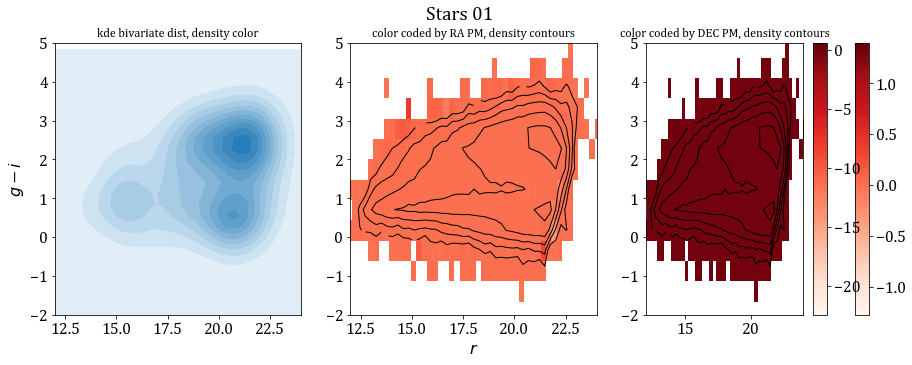

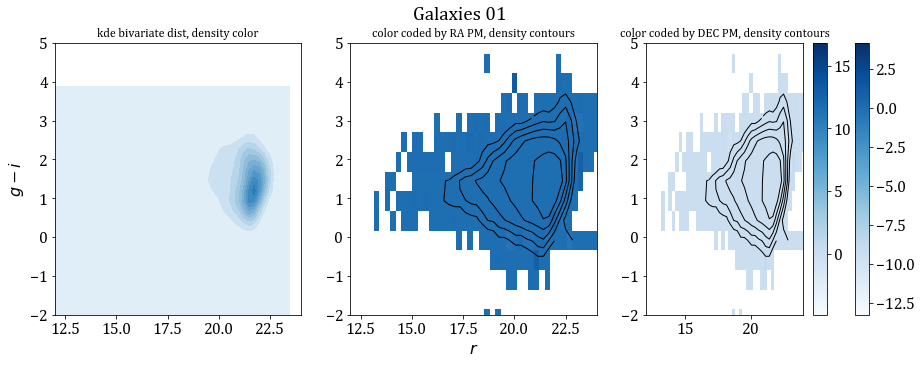

Making star plots for file HLC.RA_01_to_02.fits
Making galaxies plots for file HLC.RA_01_to_02.fits


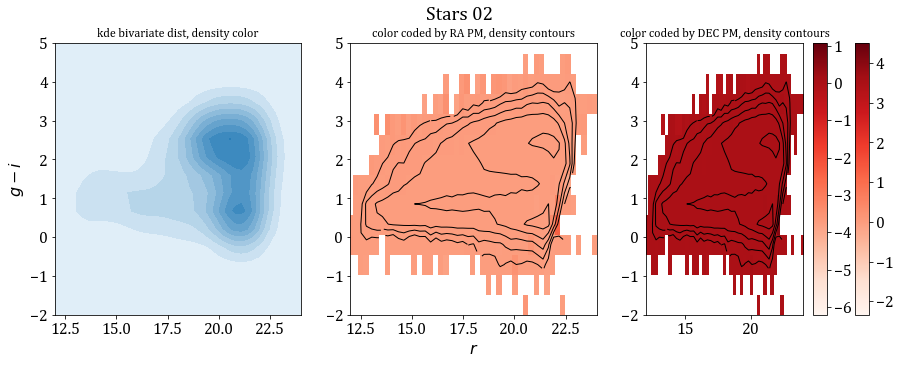

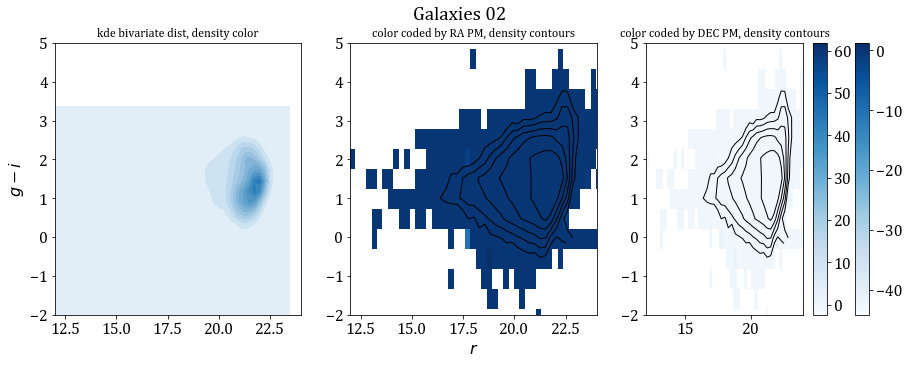

Making star plots for file HLC.RA_02_to_03.fits
Making galaxies plots for file HLC.RA_02_to_03.fits


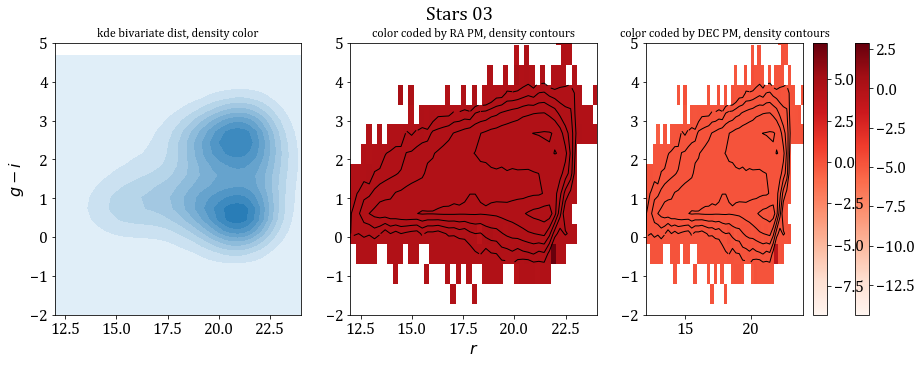

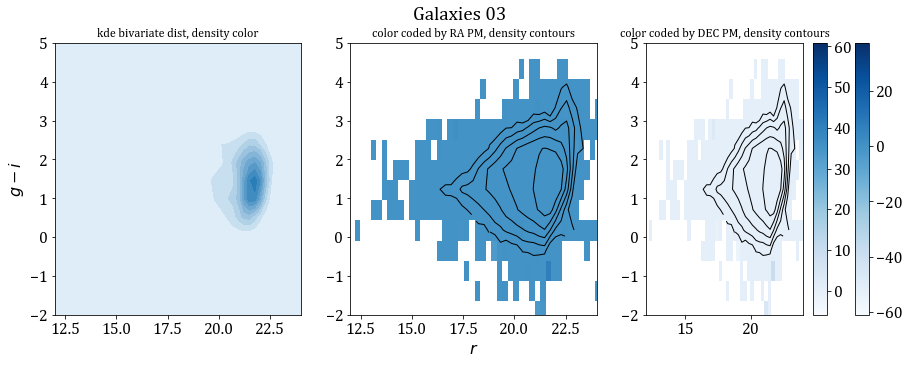

Making star plots for file HLC.RA_03_to_04.fits
Making galaxies plots for file HLC.RA_03_to_04.fits


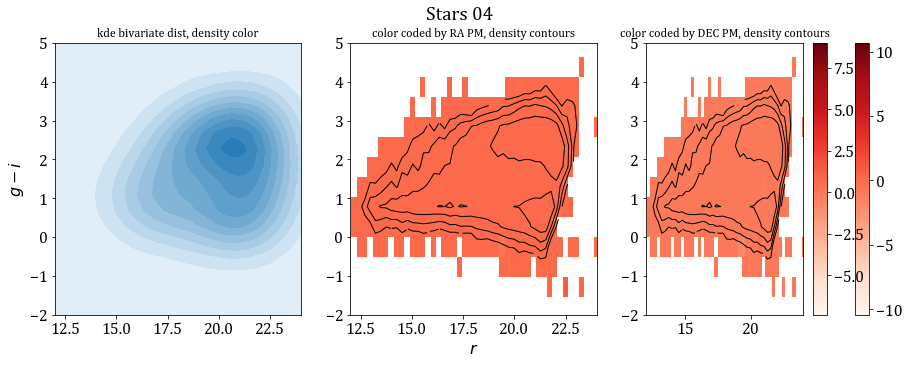

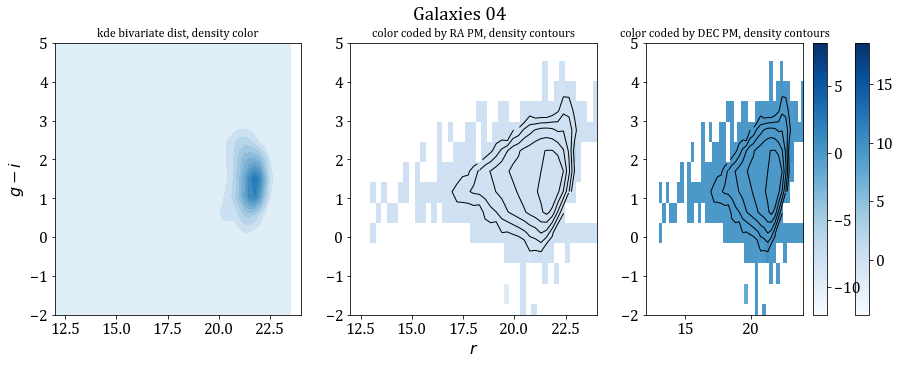

Making star plots for file HLC.RA_20_to_21.fits
Making galaxies plots for file HLC.RA_20_to_21.fits


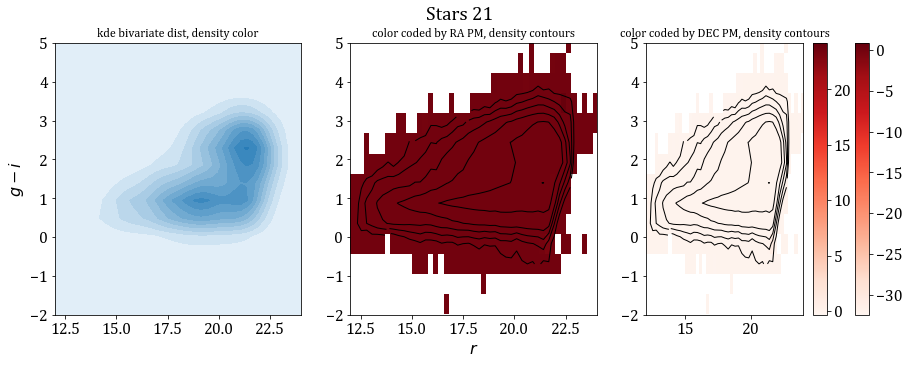

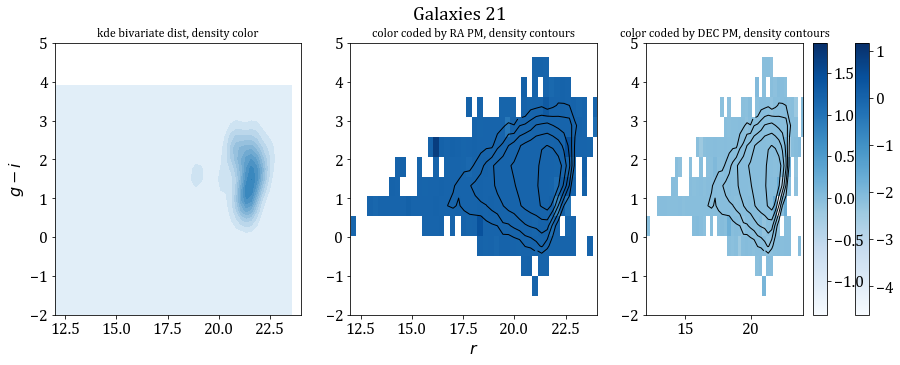

Making star plots for file HLC.RA_21_to_22.fits
Making galaxies plots for file HLC.RA_21_to_22.fits


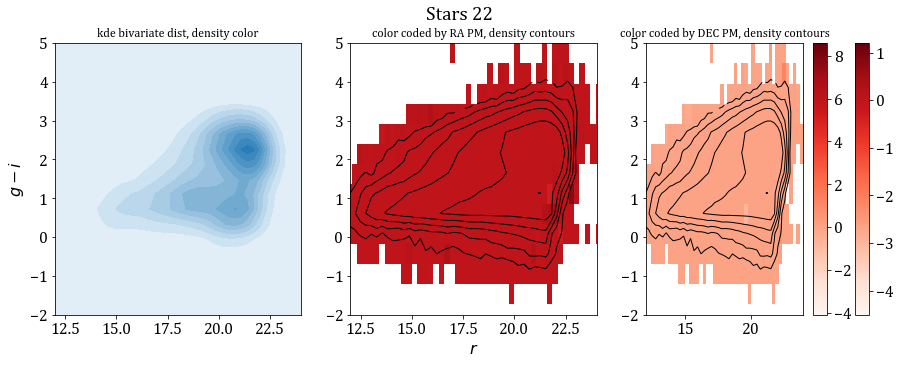

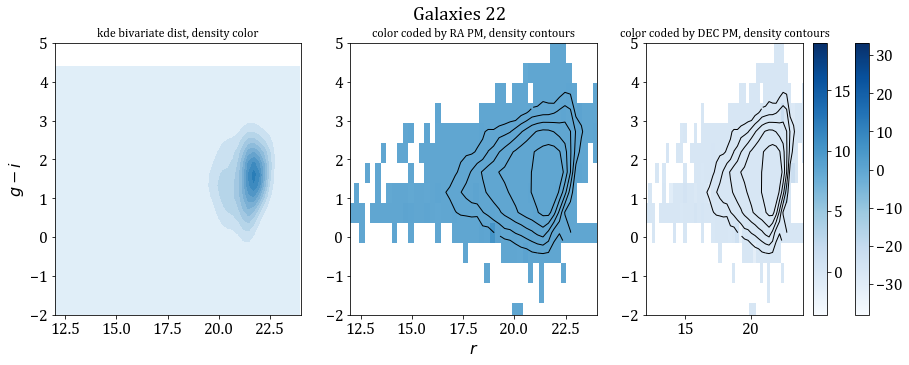

Making star plots for file HLC.RA_22_to_23.fits
Making galaxies plots for file HLC.RA_22_to_23.fits


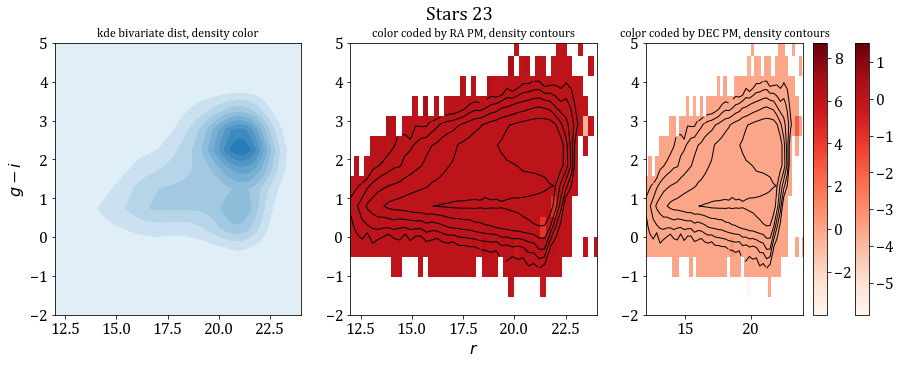

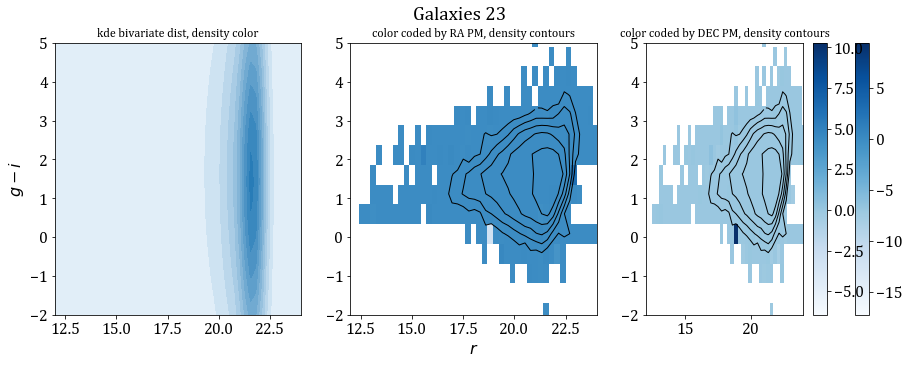

Making star plots for file HLC.RA_23_to_24.fits
Making galaxies plots for file HLC.RA_23_to_24.fits


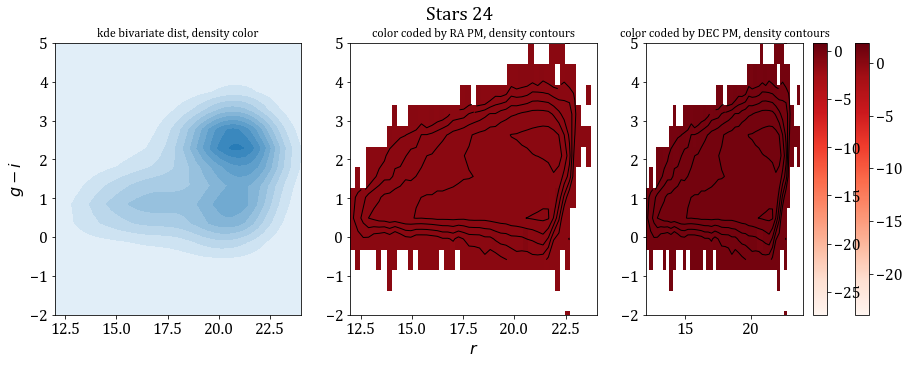

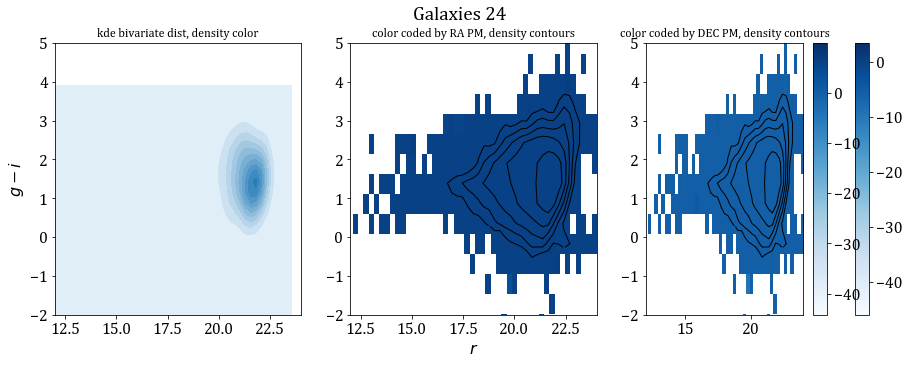

In [4]:
def main_prob1(fname, num):
    stars_r, stars_gi, stars_RA, stars_DEC = load_org_data(fname, obj_type_stars=True)
    gals_r, gals_gi, gals_RA, gals_DEC = load_org_data(fname, obj_type_stars=False)
    
    make_plots_per_dataset(stars_r, stars_gi, stars_RA, stars_DEC, 'Stars {}'.format(num), obj_type_stars=True)
    make_plots_per_dataset(gals_r, gals_gi, gals_RA, gals_DEC, 'Galaxies {}'.format(num), obj_type_stars=False)

main_prob1('HLC.RA_00_to_01.fits', '01')
main_prob1('HLC.RA_01_to_02.fits', '02')
main_prob1('HLC.RA_02_to_03.fits', '03')
main_prob1('HLC.RA_03_to_04.fits', '04')
main_prob1('HLC.RA_20_to_21.fits', '21')
main_prob1('HLC.RA_21_to_22.fits', '22')
main_prob1('HLC.RA_22_to_23.fits', '23')
main_prob1('HLC.RA_23_to_24.fits', '24')

## MEL DO THIS Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.

The stars consistently have more red color than the galaxies do as shown by the leftmost plots, where the structure of the plots are more widely distributed in $x$ for stars. There are also a few bimodal features in the stars plots but not the galaxies. 

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

# load in the data and sort it
path_git = '/Users/melaniearchipley/ast596_2020_Spring/data/01/'
intro_stat = pd.read_csv(os.path.join(path_git, 'IntroStat_demo.csv'))

def get_init_values(data):
    mu = np.mean(data)
    var = np.var(data)
    sig = np.std(data)
    print('Sample mean is {} and sample variance is {}.'.format(round(mu,5), round(var,5)))

    # first method of line using mu + sig*x
    line_x = np.linspace(-2.5, 2.5, 100)
    line_y = mu + sig*line_x
    return line_x, line_y

In [6]:
# for two points on a line, http://mathworld.wolfram.com/Two-PointForm.html
def eqn_of_line(x, x1, y1, x2, y2):
    return ((y2 - y1)/(x2-x1))*(x-x1) + y1

Sample mean is 18.56108 and sample variance is 0.00508.
1000


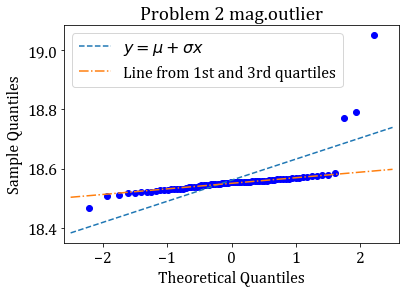

Sample mean is 18.54834 and sample variance is 0.00205.
1000


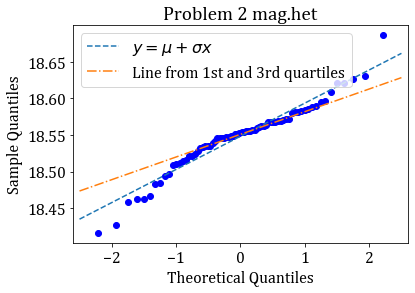

In [7]:
def main(data, title):
    line_x, line_y = get_init_values(data)
    
    normdist = np.random.normal(0, 1, 1000)
    print(len(normdist))
    
    # find quartile values
    sort_intro = sorted(data)
    first_norm = np.quantile(sorted(normdist), 0.25)
    third_norm = np.quantile(sorted(normdist), 0.75)
    
    first_quan = np.quantile(sort_intro, 0.25)
    third_quan = np.quantile(sort_intro, 0.75)

    quan_y = eqn_of_line(line_x, first_norm, first_quan, third_norm, third_quan)

    sm.qqplot(data)
    plt.plot(line_x, line_y, '--', label=r'$y = \mu + \sigma x$')
    plt.plot(line_x, quan_y, '-.', label='Line from 1st and 3rd quartiles')
    plt.title('Problem 2 {}'.format(title))
    plt.legend()
    plt.show()
    
main(intro_stat['mag.outlier'], 'mag.outlier')
main(intro_stat['mag.het'], 'mag.het')

Each method does not have equal impact on how closely it follows the data points. In the outliers data, the quartile method looks better as it is not so skewed by the outliers. But in the het plot, the two methods similarly do not closely follow the data. The het data's outliers are not as strong as in the outliers plot, but there are more of them, so the $y$ line follows them more.

Sample mean is 0.1148 and sample variance is 0.82355.
1000


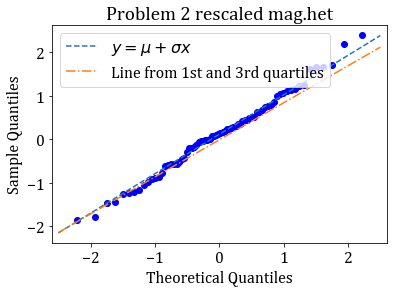

In [8]:
rescaled = (intro_stat['mag.het'] - np.mean(intro_stat['mag.het'])) / intro_stat['mag.het.error']
main(rescaled, 'rescaled mag.het')

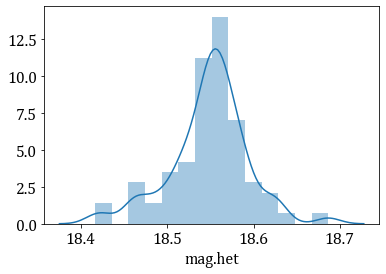

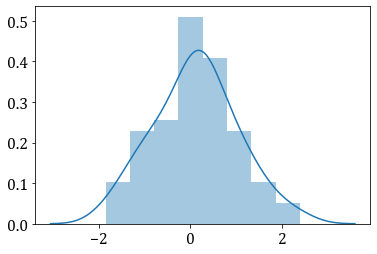

In [9]:
sns.distplot(intro_stat['mag.het'])
sns.distplot(rescaled)

With rescaling the data, the methods have nearly identical results! The outliers haven't been clipped, but now both methods represent the data quite well. Dividing by the error means that the outliers are *weighted* less overall.

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

In [10]:
cephs = pd.read_csv(os.path.join(path_git, 'Cepheids.csv'))

LMC_idx = [idx for idx, val in enumerate(cephs['Cloud']) if val == 'LMC']
SMC_idx = [idx for idx, val in enumerate(cephs['Cloud']) if val == 'SMC']
LMC_vals = cephs['Mode'][LMC_idx]
SMC_vals = cephs['Mode'][SMC_idx]

F_LMC_idx = [idx for idx, val in enumerate(LMC_vals) if val == 'F']
one_LMC_idx = [idx for idx, val in enumerate(LMC_vals) if val == '1']
F_SMC_idx = [idx for idx, val in enumerate(SMC_vals) if val == 'F']
one_SMC_idx = [idx for idx, val in enumerate(SMC_vals) if val == '1']

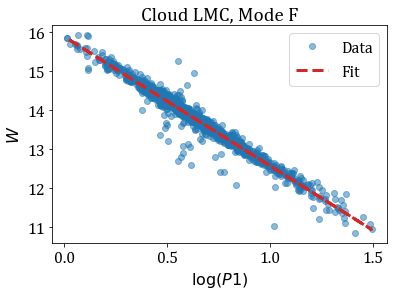

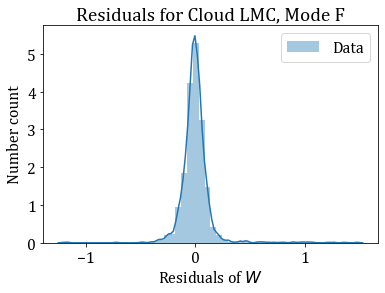

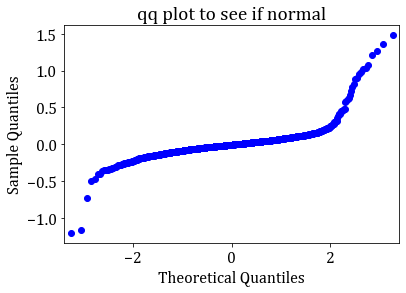

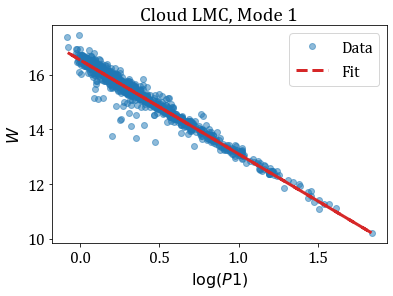

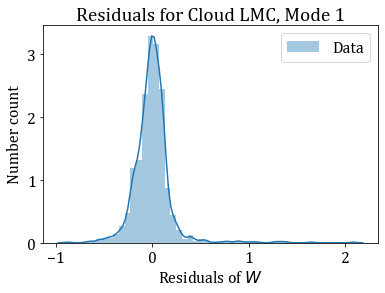

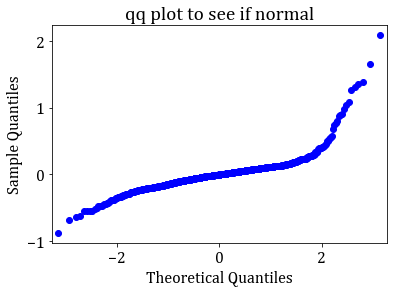

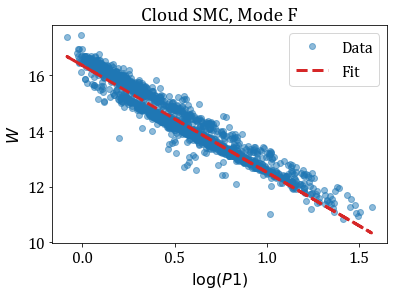

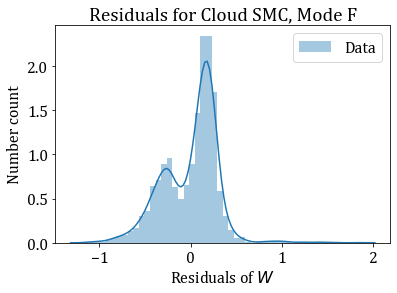

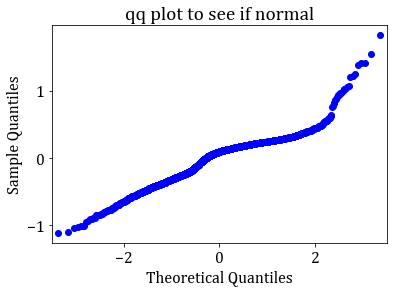

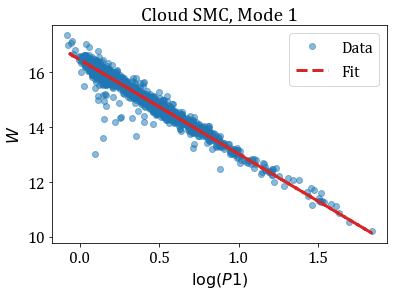

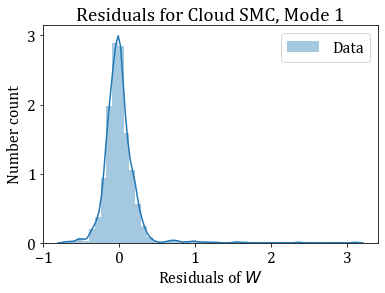

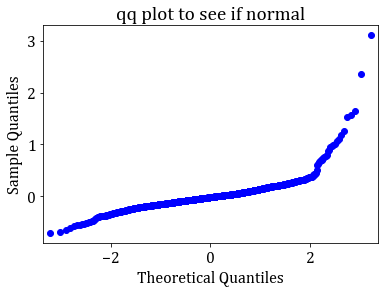

In [11]:
def plot_W_calc_res(index, cloud, mode):
    p = np.polyfit(cephs['logP1'][index], cephs['W'][index], 1)
    y = p[0]*cephs['logP1'][index] + p[1]
    resid = y - cephs['W'][index]
    
    plt.plot(cephs['logP1'][index], cephs['W'][index], 'C0o', alpha=0.5, label='Data')
    plt.plot(cephs['logP1'][index], y, '--', label='Fit', color='C3', lw=3)
    plt.xlabel(r'$\mathrm{log}(P1)$')
    plt.ylabel(r'$W$')
    plt.title('Cloud {}, Mode {}'.format(cloud, mode))
    plt.legend()
    plt.show()
    
    sns.distplot(resid, label='Data')
    plt.xlabel(r'Residuals of $W$')
    plt.ylabel(r'Number count')
    plt.title('Residuals for Cloud {}, Mode {}'.format(cloud, mode))
    plt.legend()
    plt.show()
    
    sm.qqplot(resid)
    plt.title('qq plot to see if normal')
    plt.show()
    
    return resid, y
    
resid_F_LMC, fitW_F_LMC = plot_W_calc_res(F_LMC_idx, 'LMC', 'F')
resid_one_LMC, fitW_one_LMC = plot_W_calc_res(one_LMC_idx, 'LMC', '1')
resid_F_SMC, fitW_F_SMC = plot_W_calc_res(F_SMC_idx, 'SMC', 'F')
resid_one_SMC, fitW_one_SMC = plot_W_calc_res(one_SMC_idx, 'SMC', '1')

The residuals are *not* normal. Though in the histograms, they look like they could be normal (except for SMC, F, which looks bimodal - I suspect I have an indexing problem but I cannot find it!), the qq-plots show the truth. If they were normal, the qq-plots would show the data points along a y=x line. Their shape instead points to skews and some bimodality. Physically, because these objects are *so* bright, their residuals are more narrow than a typical Gaussian distribution. I would also suspect that biases (Eddington, Malmquist) in luminosity observations result in skews.

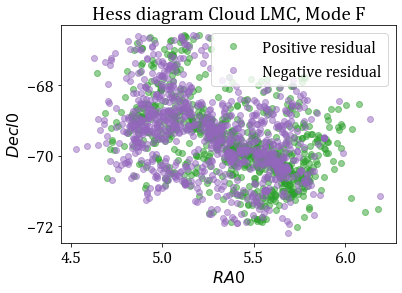

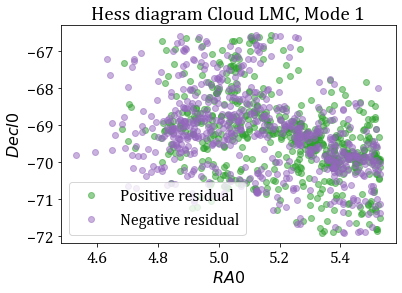

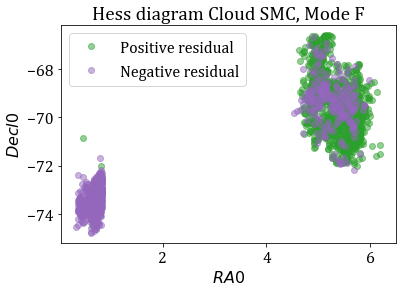

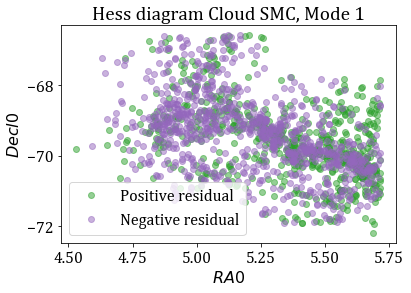

In [12]:
def plot_resid_color(index, resid, cloud, mode):
    pos_idx = [idx for idx, val in enumerate(resid) if val > 0]
    neg_idx = [idx for idx, val in enumerate(resid) if val < 0]
    
    plt.plot(cephs['RA0'][pos_idx], cephs['Decl0'][pos_idx], 'C2o', alpha=0.5, label='Positive residual')
    plt.plot(cephs['RA0'][neg_idx], cephs['Decl0'][neg_idx], 'C4o', alpha=0.5, label='Negative residual')
    plt.xlabel(r'$RA0$')
    plt.ylabel(r'$Decl0$')
    plt.title('Hess diagram Cloud {}, Mode {}'.format(cloud, mode))
    plt.legend()
    plt.show()
    
plot_resid_color(F_LMC_idx, resid_F_LMC, 'LMC', 'F')
plot_resid_color(one_LMC_idx, resid_one_LMC, 'LMC', '1')
plot_resid_color(F_SMC_idx, resid_F_SMC, 'SMC', 'F')
plot_resid_color(one_SMC_idx, resid_one_SMC, 'SMC', '1')

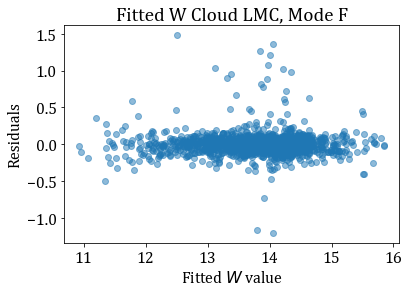

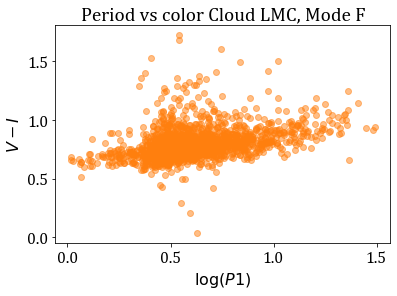

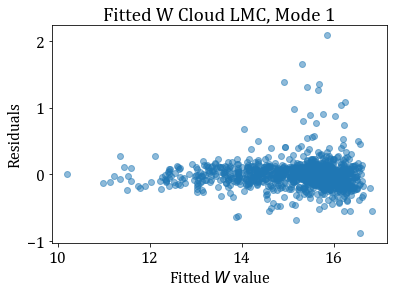

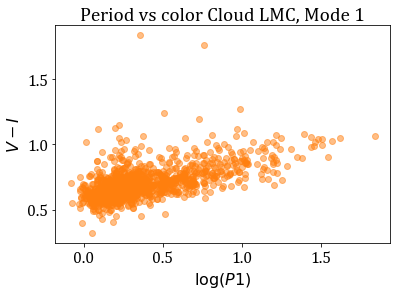

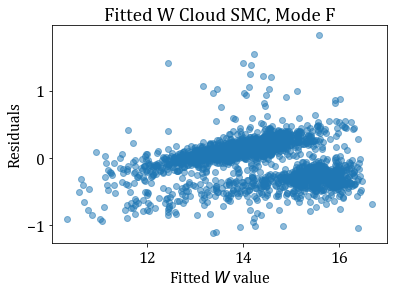

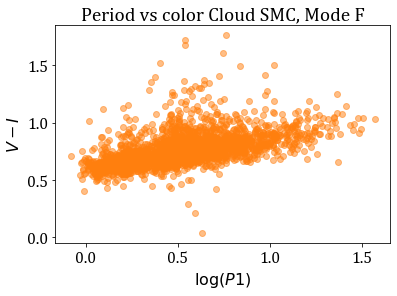

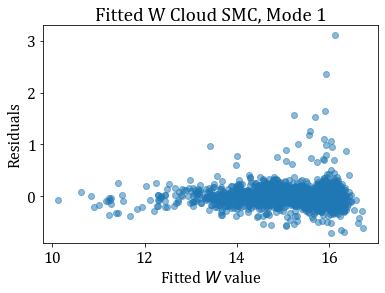

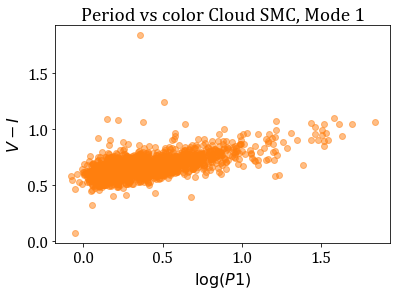

In [13]:
def plot_res_against_fitW(index, resid, fit_W, cloud, mode):
    plt.plot(fit_W, resid, 'C0o', alpha=0.5)
    plt.xlabel(r'Fitted $W$ value')
    plt.ylabel('Residuals')
    plt.title('Fitted W Cloud {}, Mode {}'.format(cloud, mode))
    plt.show()
    
    plt.plot(cephs['logP1'][index], cephs['VI'][index], 'C1o', alpha=0.5)
    plt.xlabel(r'$\mathrm{log}(P1)$')
    plt.ylabel(r'$V-I$')
    plt.title('Period vs color Cloud {}, Mode {}'.format(cloud, mode))
    plt.show()
    
plot_res_against_fitW(F_LMC_idx, resid_F_LMC, fitW_F_LMC, 'LMC', 'F')
plot_res_against_fitW(one_LMC_idx, resid_one_LMC, fitW_one_LMC, 'LMC', '1')
plot_res_against_fitW(F_SMC_idx, resid_F_SMC, fitW_F_SMC, 'SMC', 'F')
plot_res_against_fitW(one_SMC_idx, resid_one_SMC, fitW_one_SMC, 'SMC', '1')

The residuals are more spread out at higher fitted $W$ values. The bimodal behavior in SMC, F is again apparent here (though I suspect I made a mistake).